In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import openpyxl 
import os

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.metrics import r2_score
from scipy import stats
import csv
import statsmodels.api as sm

In [3]:
from load_data import load_processed_general_data
from load_data import load_processed_society_data
from load_data import load_processed_quality_of_life_data

In [4]:
def MinMaxNormal(df):
    normalized_df=(df-df.min())/(df.max()-df.min())
    return normalized_df

In [5]:
def denormal(normalized_df,original_df):
    df = (normalized_df*(original_df.max()-original_df.min()))
    df+=original_df.min()
    return df

In [6]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true=np.array(y_true)
    y_pred=np.array(y_pred)
    MSPE = (sum((MinMaxNormal(y_pred)-MinMaxNormal(y_true))**2)/(y_pred.size))/(MinMaxNormal(y_true).mean())
    MSPE = MSPE*100
    return np.abs(MSPE)

In [7]:
def R2test(test_set,value_set):
    results = []
    for i in  range(len(value_set[0,:])):
        R2 = r2_score(test_set,value_set[:,i])
        results.append(R2)
    return results

In [8]:
def produce_predictions_linear_regression(train_X, test_X, train_y, test_y):
    # data fitting
    model = LinearRegression().fit(train_X, train_y)
    # make predictions
    predictions = model.predict(test_X)
    return predictions,model

In [9]:
median_houses_2020,lower_quatile_houses_2020,A_B_property_counts,C_D_property_counts,E_F_property_counts,G_H_property_counts,local_authority_names = load_processed_general_data()
worksheet,lower_quatile_earning_2020,ratio_by_lower_quatile_2020,median_earning_2020,ratio_by_medians_2020,month_rent_higher_quatile,month_rent_lower_quatile,total_threaten_homeless,violence_crime_ratio,sexual_crime_ratio,robbery_crime_ratio,theft_crime_ratio,damage_arson_crime_ratio,drug_crime_ratio,other_crime_ratio,employment_data,male_life_expectency,female_life_expectency,total_households_2020,households_with_children_ratio,one_female_households_ratio,one_male_households_ratio,pop_under_10_ratio,pop_teenager_ratio,pop_20_39_ratio,pop_40_60_ratio,pop_60_80_ratio,pop_80_90_ratio,total_population_2020,size_of_la_area = load_processed_society_data()
taxi_only_licensed_drivers,total_drivers,education_sector_size,health_sector_size,art_and_entertainment_sector_size,retail_sector_size = load_processed_quality_of_life_data()

In [10]:
worksheet.describe()

,Violence against the person ratio,Sexual offences ratio,Robbery ratio,Theft offences ratio,Criminal damage and arson ratio,Drug offences ratio,Other Crime Ratio,Total Employee All (thousands),Median,Lower quartile,...,C_D_property_counts,E_F_property_counts,G_H_property_counts,Taxi_only_licensed_drivers,Total_licensed_vehicles,total_drivers,Retail,Education,Health,"Arts, entertainment, recreation & other services"
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,...,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,0.337481,0.004187,-0.018529,0.276075,0.085445,0.009234,0.097227,62.518444,736.703170,621.760807,...,26065.567723,10218.363112,2803.377522,71.181556,475.458213,546.786744,543.149856,116.074928,255.512968,426.161383
std,0.236925,0.173706,0.169622,0.244748,0.192969,0.174981,0.200614,74.597581,380.939796,315.408759,...,20047.623037,9098.640076,4178.593874,206.890169,805.241051,924.116551,588.027722,101.746257,240.230746,421.717240
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.343681,0.027617,0.004478,0.256080,0.100418,0.026666,0.100826,24.050000,575.000000,475.000000,...,13770.000000,4185.000000,480.000000,0.000000,127.500000,147.500000,250.000000,55.000000,125.000000,215.000000
50%,0.382533,0.032577,0.006952,0.291099,0.114448,0.034217,0.120590,47.200000,700.000000,595.000000,...,22650.000000,7670.000000,1380.000000,0.000000,260.000000,289.000000,370.000000,95.000000,195.000000,315.000000
75%,0.416657,0.037471,0.011302,0.348055,0.127899,0.045336,0.142430,82.400000,950.000000,800.000000,...,32130.000000,13670.000000,3660.000000,56.500000,521.500000,597.000000,645.000000,150.000000,327.500000,505.000000
max,0.490262,0.134678,0.064232,1.046934,0.490466,0.124212,0.692536,704.100000,2171.000000,1700.000000,...,122490.000000,52600.000000,39980.000000,2295.000000,9755.000000,9849.000000,4500.000000,760.000000,2290.000000,4415.000000


In [11]:
quality_of_life_dataframe = pd.DataFrame([worksheet['Education'],worksheet['Arts, entertainment, recreation & other services'],worksheet['Year 2020: One person households: Female ratio'],worksheet['Year 2020: One person households: Male ratio'],worksheet['Year 2020: Households with dependent children ratio'],worksheet['pop_ratio_under_10'],worksheet['pop_ratio_teenager'],worksheet['pop_ratio_20_39'],worksheet['pop_ratio_40_60'],worksheet['pop_ratio_60_80'],worksheet['pop_ratio_80_90+']])

In [12]:
quality_of_life_dataframe = quality_of_life_dataframe.transpose()

In [13]:
train_X, test_X, train_y, test_y = train_test_split(quality_of_life_dataframe, median_houses_2020, test_size=0.2, random_state=0,)

In [14]:
# normalization
train_X_norm = MinMaxNormal(train_X)
test_X_norm = MinMaxNormal(test_X)
train_y_norm = MinMaxNormal(train_y)
test_y_norm = MinMaxNormal(test_y)

In [43]:
# with statsmodels
XX = sm.add_constant(train_X_norm) # adding a constant
test_stats_model_overall = sm.add_constant(test_X_norm) # adding a constant
statsmodel_model = sm.OLS(train_y_norm, XX).fit()
statsmodel_predictions = statsmodel_model.predict(test_stats_model_overall) 
print_model = statsmodel_model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     median_houses_2020   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     42.99
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           1.44e-52
Time:                        09:28:22   Log-Likelihood:                 343.73
No. Observations:                 276   AIC:                            -663.5
Df Residuals:                     264   BIC:                            -620.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [44]:
# De-Normalized Predicted Data 
predicted_house_price_denorm = denormal(statsmodel_predictions,test_y)

In [45]:
# predictions and model
f_predictions,example_model = produce_predictions_linear_regression(train_X_norm, test_X_norm, train_y_norm, test_y_norm)

In [46]:
# Return the normalized values to real values
f_predictions = denormal(f_predictions,test_y)

In [47]:
example_mlr_scores = pd.DataFrame(example_model.coef_)

In [87]:
example_mlr_scores.columns = ['Scores']
example_mlr_scores.index = train_X_norm.columns

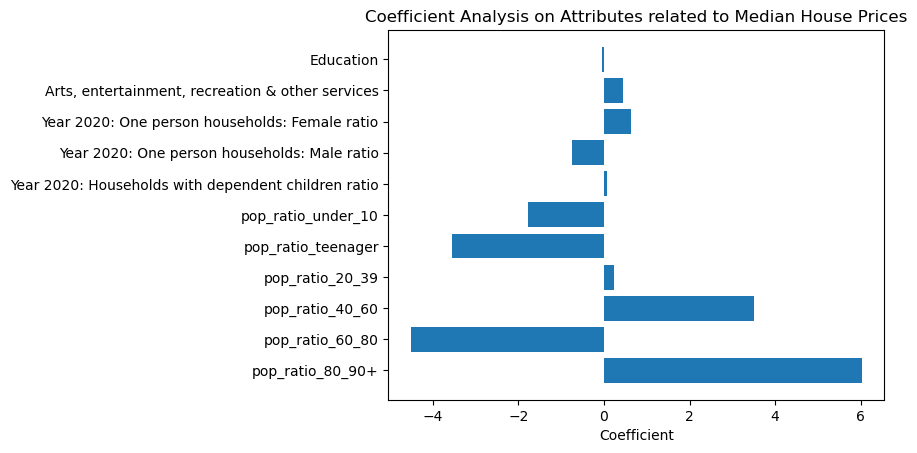

In [88]:
# Fixing random state for reproducibility
np.random.seed(0)
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
x_names = list(example_mlr_scores.index[:])
y_pos = np.arange(len(x_names))

ax.barh(y_pos, example_mlr_scores['Scores'].values, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(y_pos)
ax.set_yticklabels(list(x_names))
ax.set_xlabel('Coefficient')
ax.set_title('Coefficient Analysis on Attributes related to Median House Prices')
plt.savefig('Figure/mlr_Coefficient_analysis.png')
plt.show()

In [50]:
cwd = os.getcwd()
example_mlr_scores.to_csv(os.path.join(cwd, "example_mlr_model_scores.csv"))  

In [85]:
mean_absolute_percentage_error(test_y,f_predictions)

5.774500873654643

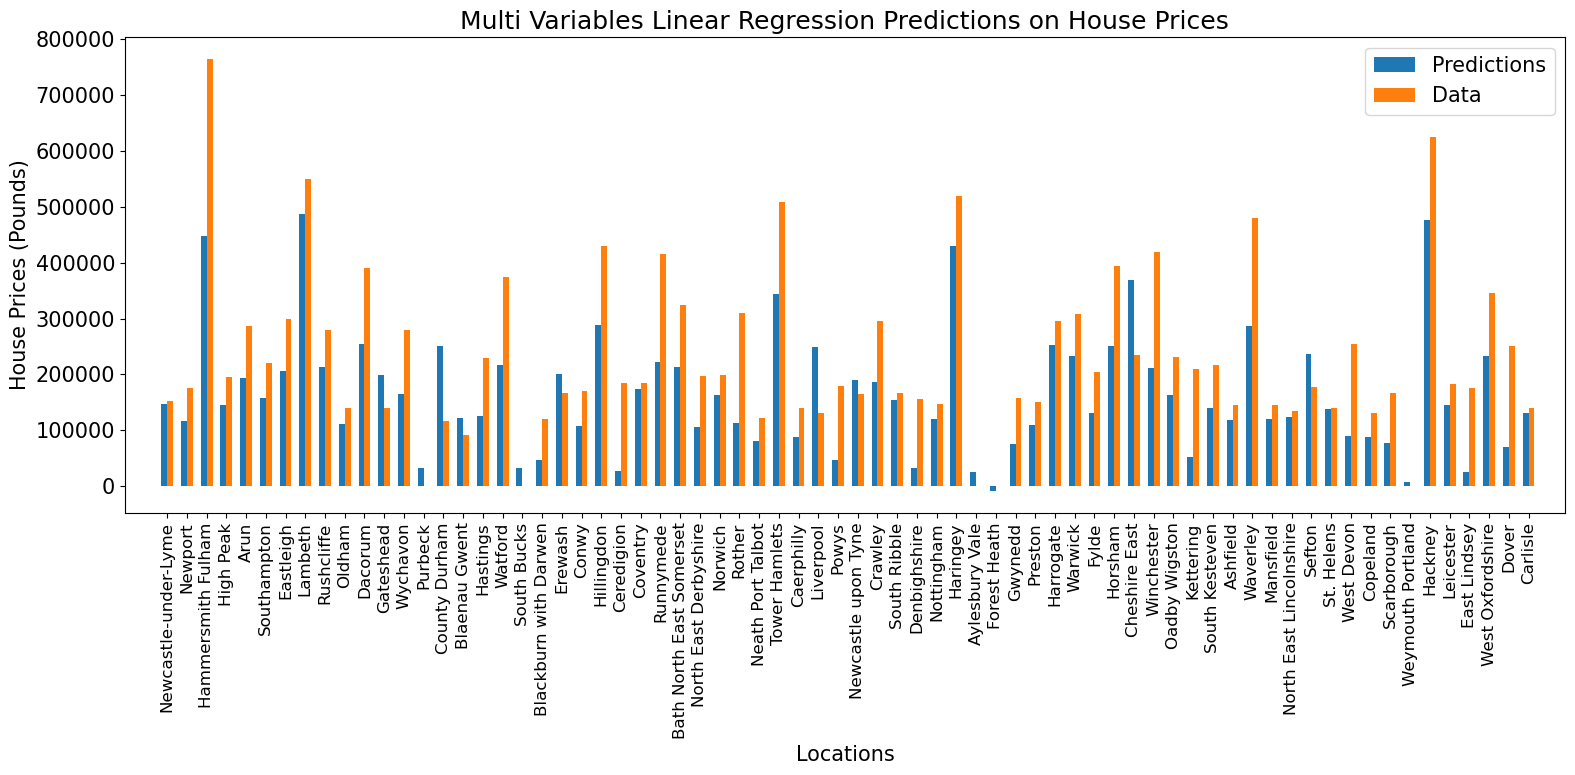

In [51]:
N =len(f_predictions)
locations = range(1,N+1)

# Position of bars on x-axis
y_pos = np.arange(N)

# Width of a bar 
width = 0.3
# Plotting
plt.rcParams.update({'font.size': 15})
fig_r2, ax = plt.subplots(figsize=(16,8))
plt.bar(y_pos, f_predictions , width, label='Predictions')
plt.bar(y_pos + width, test_y, width, label='Data')
plt.xlabel('Locations')
plt.ylabel('House Prices (Pounds)')
plt.title('Multi Variables Linear Regression Predictions on House Prices')

# xticks()
plt.xticks(y_pos + width / 2, list(local_authority_names[test_y.index]))
plt.setp(ax.get_xticklabels(), fontsize=12, rotation='vertical')
# Size of the Plot
plt.xlim([-2,max(y_pos)+2])
# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('full_prediction_plots.png')
plt.show()

0.05774500873654643